In [29]:
#  Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

In [4]:
# Read test target data

y_test = pd.read_csv('./preds/y_test.csv')

In [5]:
#  Read and concatenate model preds and pred proba

preds = []
for file in ['./preds/logr.csv',
             './preds/logr_proba.csv',
             './preds/mnb.csv',
             './preds/mnb_proba.csv',
             './preds/gnb.csv',
             './preds/gnb_proba.csv',
             './preds/bnb.csv',
             './preds/bnb_proba.csv',
             './preds/knn.csv',
             './preds/knn_proba.csv',
             './preds/dt.csv',
             './preds/dt_proba.csv',
             './preds/rf.csv',
             './preds/rf_proba.csv',
            './preds/abc.csv',
            './preds/abc_proba.csv']:
    preds.append(pd.read_csv(file))

In [6]:
preds = pd.concat(preds,axis=1)

In [27]:
#  Rename columns - prediction, p(vegan), p(plant)

preds.columns = ['logr','logr_0','logr_1',
                'mnb','mnb_0','mnb_1',
                'gnb','gnb_0','gnb_1',
                'bnb','bnb_0','bnb_1',
                'knn','knn_0','knn_1',
                'dt','dt_0','dt_1',
                'rf','rf_0','rf_1',
                'abc','abc_0','abc_1']

In [28]:
# View preds

preds.head()

,logr,logr_0,logr_1,mnb,mnb_0,mnb_1,gnb,gnb_0,gnb_1,bnb,...,knn_1,dt,dt_0,dt_1,rf,rf_0,rf_1,abc,abc_0,abc_1
0,0,0.926508,0.073492,0,0.538297,0.461703,0,0.798804,0.201196,0,...,0.133333,0,0.970152,0.029848,0,0.782633,0.217367,0,0.504271,0.495729
1,0,0.999979,0.000021,0,0.999369,0.000631,0,0.999981,0.000019,0,...,0.066667,0,0.970152,0.029848,0,0.909439,0.090561,0,0.515173,0.484827
2,0,0.981561,0.018439,0,0.974625,0.025375,0,0.902731,0.097269,0,...,0.133333,0,0.970152,0.029848,0,0.866673,0.133327,0,0.510199,0.489801
3,0,0.960606,0.039394,0,0.981099,0.018901,0,0.903424,0.096576,0,...,0.066667,0,0.970152,0.029848,0,0.813555,0.186445,0,0.504712,0.495288
4,0,0.929205,0.070795,0,0.915686,0.084314,0,0.901831,0.098169,0,...,0.200000,0,0.970152,0.029848,0,0.809036,0.190964,0,0.504900,0.495100


In [10]:
#  View columns

preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9097 entries, 0 to 9096
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   logr    9097 non-null   int64  
 1   logr_0  9097 non-null   float64
 2   logr_1  9097 non-null   float64
 3   mnb     9097 non-null   int64  
 4   mnb_0   9097 non-null   float64
 5   mnb_1   9097 non-null   float64
 6   gnb     9097 non-null   int64  
 7   gnb_0   9097 non-null   float64
 8   gnb_1   9097 non-null   float64
 9   bnb     9097 non-null   int64  
 10  bnb_0   9097 non-null   float64
 11  bnb_1   9097 non-null   float64
 12  knn     9097 non-null   int64  
 13  knn_0   9097 non-null   float64
 14  knn_1   9097 non-null   float64
 15  dt      9097 non-null   int64  
 16  dt_0    9097 non-null   float64
 17  dt_1    9097 non-null   float64
 18  rf      9097 non-null   int64  
 19  rf_0    9097 non-null   float64
 20  rf_1    9097 non-null   float64
 21  abc     9097 non-null   int64  
 22  

In [34]:
#  Baseline accuracy
print(1 - y_test.mean())

0    0.720677
dtype: float64

In [35]:
#  Accuracy scores for each model
for model in ['logr','mnb','gnb','bnb','knn','dt','rf','abc']:
    print(model,accuracy_score(preds[model],y_test))

logr 0.8938111465318237
mnb 0.8548972188633616
gnb 0.8366494448719358
bnb 0.8554468506100913
knn 0.8169726283390129
dt 0.8347806969330549
rf 0.8124656480158294
abc 0.8783115312740464


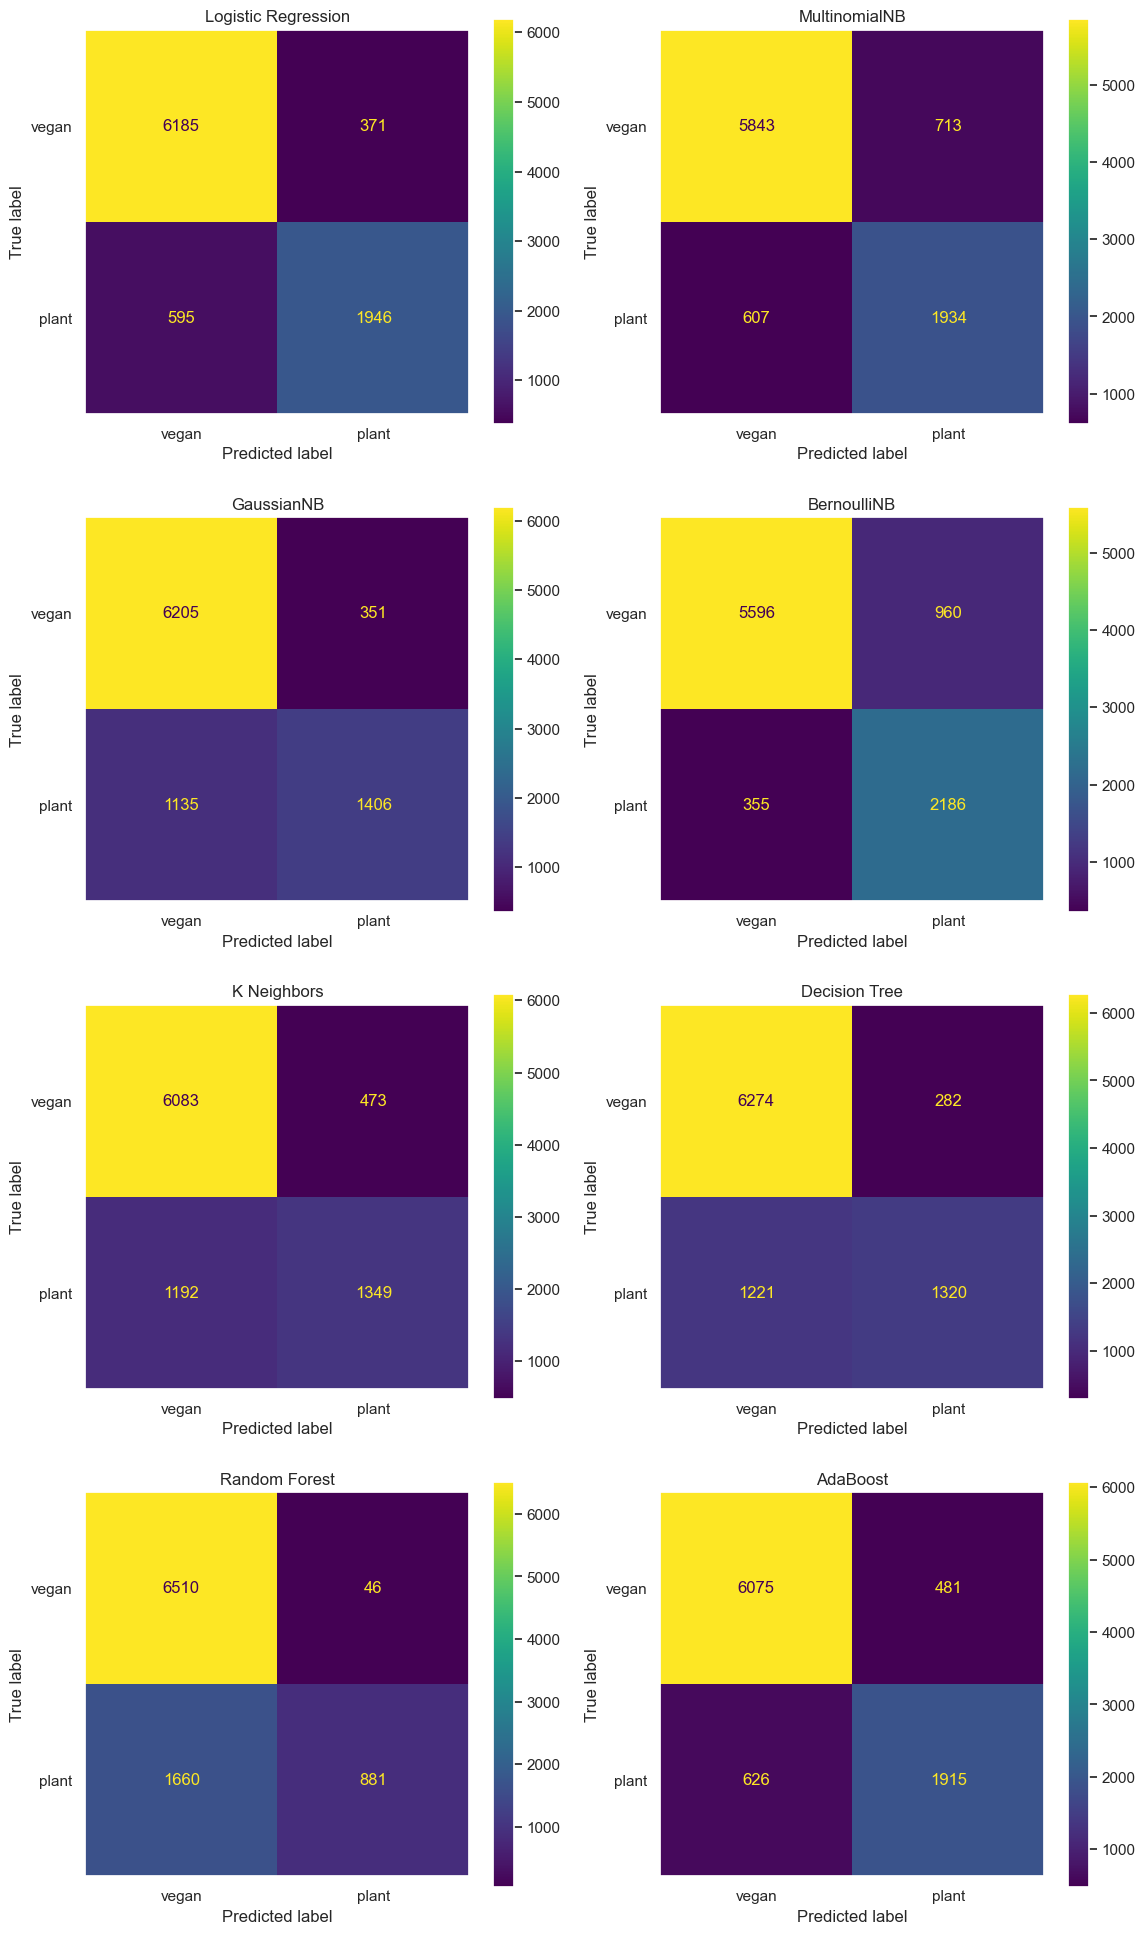

In [14]:
#  Display confusion matrix for each model

fig, axs = plt.subplots(4,2,figsize=(12,20))
plt.tight_layout(pad = 3)

ConfusionMatrixDisplay(confusion_matrix(y_test,preds['logr']),display_labels = ['vegan','plant']).plot(ax = axs[0][0])
axs[0][0].set_title('Logistic Regression')
axs[0][0].grid(None)

ConfusionMatrixDisplay(confusion_matrix(y_test,preds['mnb']),display_labels = ['vegan','plant']).plot(ax = axs[0][1])
axs[0][1].set_title('MultinomialNB')
axs[0][1].grid(None)

ConfusionMatrixDisplay(confusion_matrix(y_test,preds['gnb']),display_labels = ['vegan','plant']).plot(ax = axs[1][0])
axs[1][0].set_title('GaussianNB')
axs[1][0].grid(None)

ConfusionMatrixDisplay(confusion_matrix(y_test,preds['bnb']),display_labels = ['vegan','plant']).plot(ax = axs[1][1])
axs[1][1].set_title('BernoulliNB')
axs[1][1].grid(None)

ConfusionMatrixDisplay(confusion_matrix(y_test,preds['knn']),display_labels = ['vegan','plant']).plot(ax = axs[2][0])
axs[2][0].set_title('K Neighbors')
axs[2][0].grid(None)

ConfusionMatrixDisplay(confusion_matrix(y_test,preds['dt']),display_labels = ['vegan','plant']).plot(ax = axs[2][1])
axs[2][1].set_title('Decision Tree')
axs[2][1].grid(None)

ConfusionMatrixDisplay(confusion_matrix(y_test,preds['rf']),display_labels = ['vegan','plant']).plot(ax = axs[3][0])
axs[3][0].set_title('Random Forest')
axs[3][0].grid(None)

ConfusionMatrixDisplay(confusion_matrix(y_test,preds['abc']),display_labels = ['vegan','plant']).plot(ax = axs[3][1])
axs[3][1].set_title('AdaBoost')
axs[3][1].grid(None)



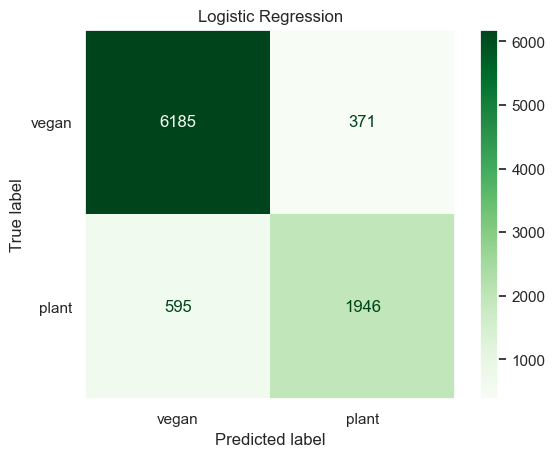

In [11]:
#  Print confusion matrix for models with highest sensitivity

ConfusionMatrixDisplay(confusion_matrix(y_test,preds['logr']),display_labels = ['vegan','plant']).plot(cmap = 'Greens')
plt.title('Logistic Regression')
plt.grid(None)

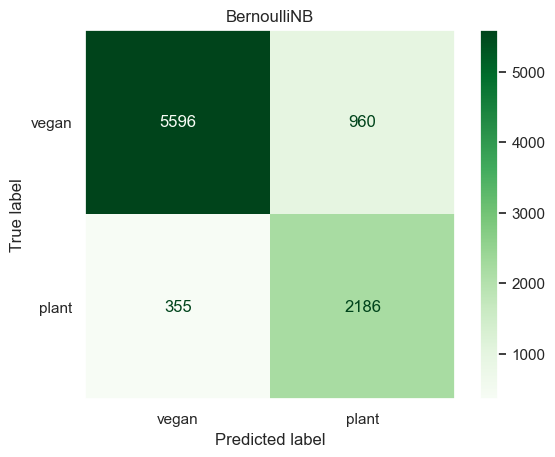

In [12]:
ConfusionMatrixDisplay(confusion_matrix(y_test,preds['bnb']),display_labels = ['vegan','plant']).plot(cmap='Greens')
plt.title('BernoulliNB')
plt.grid(None)

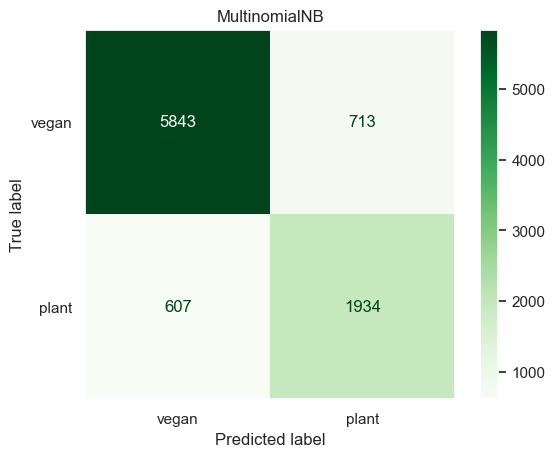

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_test,preds['mnb']),display_labels = ['vegan','plant']).plot(cmap = 'Greens')
plt.title('MultinomialNB')
plt.grid(None)

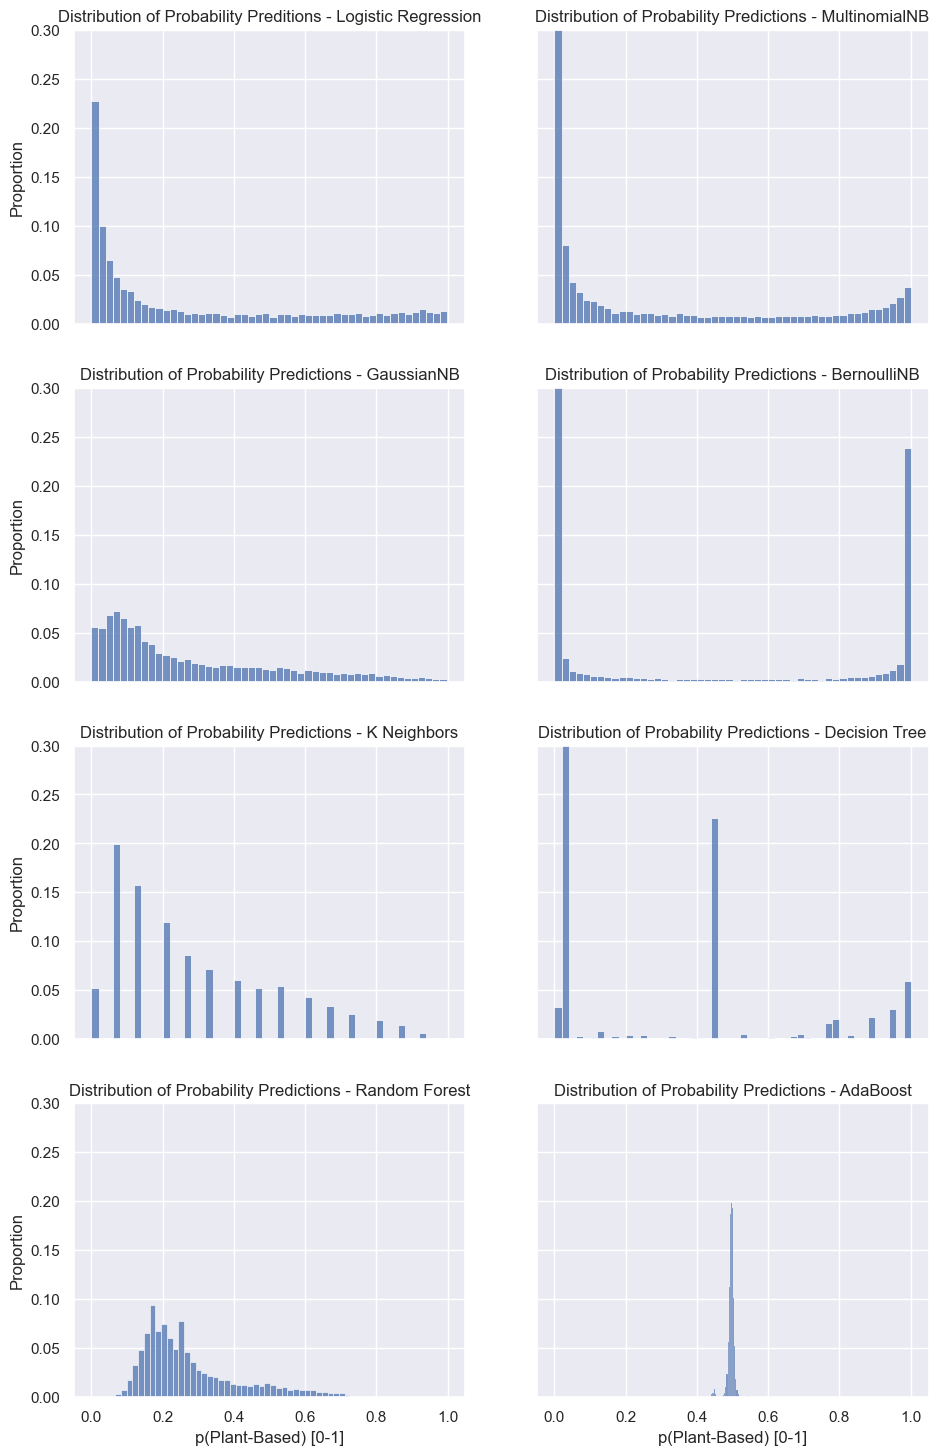

In [44]:
#  Plot probability distributions for each model

fig, axs = plt.subplots(4,2,figsize = (10,15),sharey=True, sharex=True)
plt.tight_layout(pad = 3)

sns.histplot(preds['logr_1'],
             ax = axs[0][0],
             bins = 50,
             stat='proportion')
axs[0][0].set_title('Distribution of Probability Preditions - Logistic Regression')
axs[0][0].set_xlabel('p(Plant-Based) [0-1]')
axs[0][0].set_ylim(0,0.3)

sns.histplot(preds['mnb_1'],
             ax = axs[0][1],
             bins = 50,
             stat='proportion')
axs[0][1].set_title('Distribution of Probability Predictions - MultinomialNB')

sns.histplot(preds['gnb_1'],
             ax = axs[1][0],
             bins = 50,
             stat='proportion')
axs[1][0].set_title('Distribution of Probability Predictions - GaussianNB')
axs[1][0].set_xlabel('p(Plant-Based) [0-1]')
axs[1][0].set_ylim(0,0.3)


sns.histplot(preds['bnb_1'],
             ax = axs[1][1],
             bins = 50,
             stat='proportion')
axs[1][1].set_title('Distribution of Probability Predictions - BernoulliNB')
axs[1][1].set_xlabel('p(Plant-Based) [0-1]')
axs[1][1].set_ylim(0,0.3)


sns.histplot(preds['knn_1'],
             ax = axs[2][0],
             bins = 50,
             stat='proportion')
axs[2][0].set_title('Distribution of Probability Predictions - K Neighbors')
axs[2][0].set_xlabel('p(Plant-Based) [0-1]')
axs[2][0].set_ylim(0,0.3)


sns.histplot(preds['dt_1'],
             ax = axs[2][1],
             bins = 50,
             stat='proportion')
axs[2][1].set_title('Distribution of Probability Predictions - Decision Tree')
axs[2][1].set_xlabel('p(Plant-Based) [0-1]')
axs[2][1].set_ylim(0,0.3)

sns.histplot(preds['rf_1'],
             ax = axs[3][0],
             bins = 50,
             stat='proportion')
axs[3][0].set_title('Distribution of Probability Predictions - Random Forest')
axs[3][0].set_xlabel('p(Plant-Based) [0-1]')
axs[3][0].set_ylim(0,0.3)


sns.histplot(preds['abc_1'],
             ax = axs[3][1],
             bins = 50,
             stat='proportion')
axs[3][1].set_title('Distribution of Probability Predictions - AdaBoost')
axs[3][1].set_xlabel('p(Plant-Based) [0-1]')
axs[3][1].set_ylim(0,0.3);





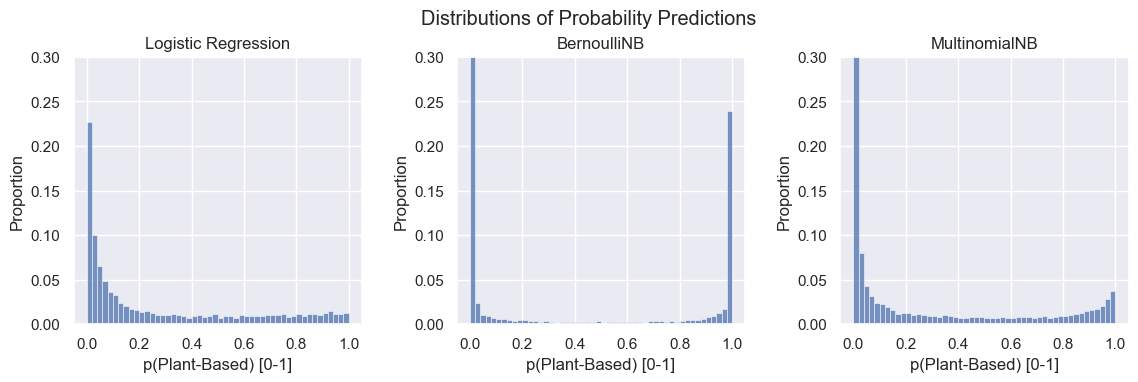

In [39]:
#  Compare prob distributions for 3 models with best specificity

fig, axs = plt.subplots(1,3,figsize=(12,4))
plt.tight_layout(pad=3)

plt.suptitle('Distributions of Probability Predictions')

sns.histplot(preds['logr_1'],
             ax = axs[0],
             bins = 50,
             stat='proportion')
axs[0].set_title('Logistic Regression')
axs[0].set_xlabel('p(Plant-Based) [0-1]')
axs[0].set_ylim(0,0.3)

sns.histplot(preds['bnb_1'],
             ax = axs[1],
             bins = 50,
             stat='proportion')
axs[1].set_title('BernoulliNB')
axs[1].set_xlabel('p(Plant-Based) [0-1]')
axs[1].set_ylim(0,0.3)

sns.histplot(preds['mnb_1'],
             ax = axs[2],
             bins = 50,
             stat='proportion')
axs[2].set_title('MultinomialNB')
axs[2].set_xlabel('p(Plant-Based) [0-1]')
axs[2].set_ylim(0,0.3);



In [18]:
#  Find posts with 95% or more predicted proba of plant or vegan
strong_plant = preds[preds['dt_1'] > 0.95].index.to_list()
strong_vegan = preds[preds['dt_0'] > 0.95].index.to_list()

In [21]:
#  Read posts from testing set
X_test = pd.read_csv('./data/X_test_tvec.csv')

In [46]:
# Match strong-plant and strong-vegan to columns in TF-IDF vect, find most common words 
df = pd.DataFrame([X_test.loc[strong_plant,:].mean().sort_values(ascending=False),
 X_test.loc[strong_vegan,:].mean().sort_values(ascending=False)]).T.head(50)

In [47]:
#  Rename columns
df.columns = ['plant','vegan']

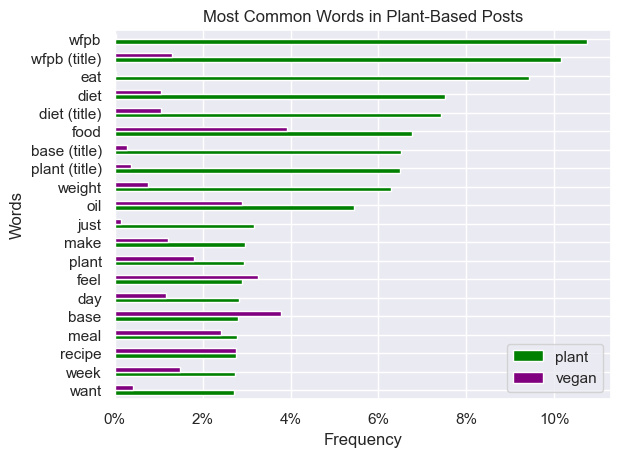

In [48]:
#  Plot most common words in plant (renaming labels to remove 'tvec' prefixes)

ax = df.sort_values(by='plant',ascending=False).head(20).\
    sort_values(by='plant').plot(kind='barh',color = ['green','purple'])
ax.set_yticklabels(['want','week','recipe','meal','base','day','feel','plant','make','just','oil','weight',
 'plant (title)','base (title)','food','diet (title)','diet','eat','wfpb (title)','wfpb']);
ax.set_title('Most Common Words in Plant-Based Posts')
ax.set_ylabel('Words')
ax.set_xlabel('Frequency')
ax.set_xticks(ticks = [0,0.02,0.04,0.06,0.08,0.10], labels = ['0%','2%','4%','6%','8%','10%']);

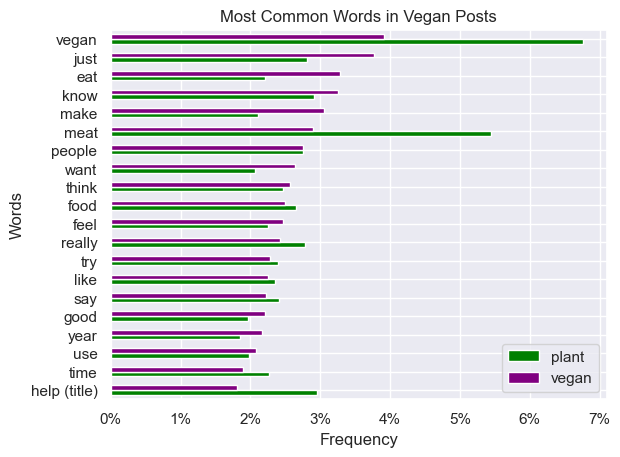

In [49]:
#  Most common words in vegan
ax = df.sort_values(by='vegan',ascending=False).head(20).\
    sort_values(by='vegan').plot(kind='barh',color = ['green','purple'])
ax.set_yticklabels(['help (title)','time','use','year','good','say','like','try','really','feel','food','think',
 'want','people','meat','make','know','eat','just','vegan']);
ax.set_title('Most Common Words in Vegan Posts')
ax.set_ylabel('Words')
ax.set_xlabel('Frequency')
ax.set_xticks(ticks = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07], labels = ['0%','1%','2%','3%','4%','5%','6%','7%']);